In [289]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [290]:
df=pd.read_csv('air_quality_data.csv')
df.head()

,Timestamp,Temperature(C),Humidity(%),PM2.5(μg/m³),PM10(μg/m³),CO(ppm),NO2(ppb),SO2(ppb),AQI
0,01-01-2024 00:00,27.483571,66.628813,265.817242,337.626685,2.472873,101.021526,83.682923,200.376655
1,01-01-2024 01:00,24.308678,71.734739,54.566963,125.466573,1.851544,82.935638,88.378372,60.036787
2,01-01-2024 02:00,28.238443,61.810216,138.862486,170.103418,2.935409,86.631339,88.860321,106.863432
3,01-01-2024 03:00,32.615149,47.031681,154.218385,236.191337,2.871755,189.581685,58.865235,116.604202
4,01-01-2024 04:00,23.829233,63.996880,159.014249,179.877096,2.162216,120.372490,92.361299,127.010633


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       1440 non-null   object 
 1   Temperature(C)  1440 non-null   float64
 2   Humidity(%)     1440 non-null   float64
 3   PM2.5(μg/m³)    1440 non-null   float64
 4   PM10(μg/m³)     1440 non-null   float64
 5   CO(ppm)         1440 non-null   float64
 6   NO2(ppb)        1440 non-null   float64
 7   SO2(ppb)        1440 non-null   float64
 8   AQI             1440 non-null   float64
dtypes: float64(8), object(1)
memory usage: 101.4+ KB


In [292]:
df.isna().sum()

Timestamp         0
Temperature(C)    0
Humidity(%)       0
PM2.5(μg/m³)      0
PM10(μg/m³)       0
CO(ppm)           0
NO2(ppb)          0
SO2(ppb)          0
AQI               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

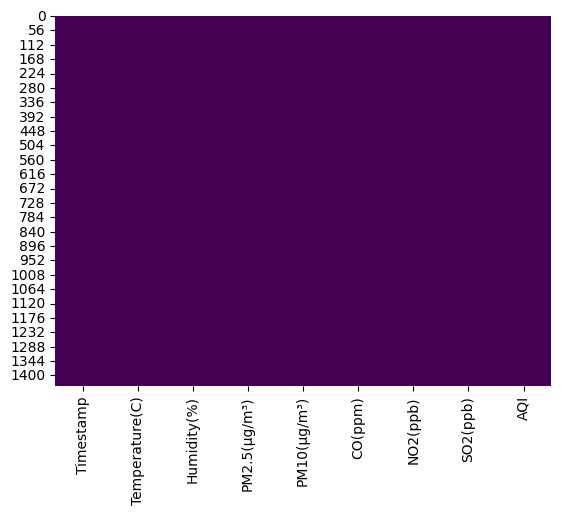

In [293]:
sns.heatmap(df.isna(), cbar= False, cmap= 'viridis')
plt.show  

# There means having no NaN values in this dataframes as visulizations

In [294]:
print('Shape of dataframes indexes and columns:', df.shape)
print('*'*20)
print('Shape of DataFrame index:', df.index)
print('*'*20)
for column_index in df.columns:
    print('all columns Names:', column_index)

Shape of dataframes indexes and columns: (1440, 9)
********************
Shape of DataFrame index: RangeIndex(start=0, stop=1440, step=1)
********************
all columns Names: Timestamp
all columns Names: Temperature(C)
all columns Names: Humidity(%)
all columns Names: PM2.5(μg/m³)
all columns Names: PM10(μg/m³)
all columns Names: CO(ppm)
all columns Names: NO2(ppb)
all columns Names: SO2(ppb)
all columns Names: AQI


In [295]:
df.select_dtypes(exclude= [int, float]).iloc[22:30]

,Timestamp
22,01-01-2024 22:00
23,01-01-2024 23:00
24,02-01-2024 00:00
25,02-01-2024 01:00
26,02-01-2024 02:00
27,02-01-2024 03:00
28,02-01-2024 04:00
29,02-01-2024 05:00


<Axes: xlabel='Temperature(C)', ylabel='Humidity(%)'>

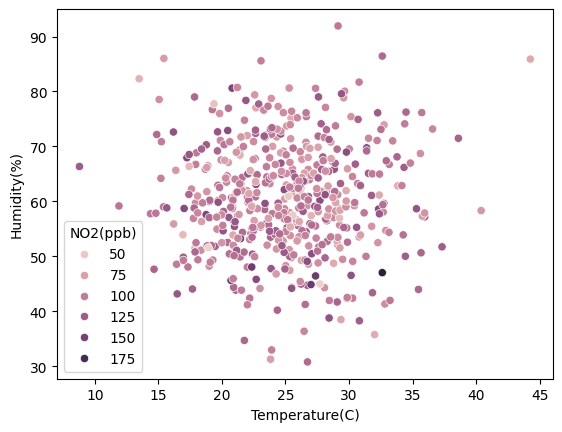

In [296]:

# Multivariance Anaylsis 

sns.scatterplot(x= df['Temperature(C)'].head(500), y= df['Humidity(%)'].head(500), hue= df['NO2(ppb)'].head(500))

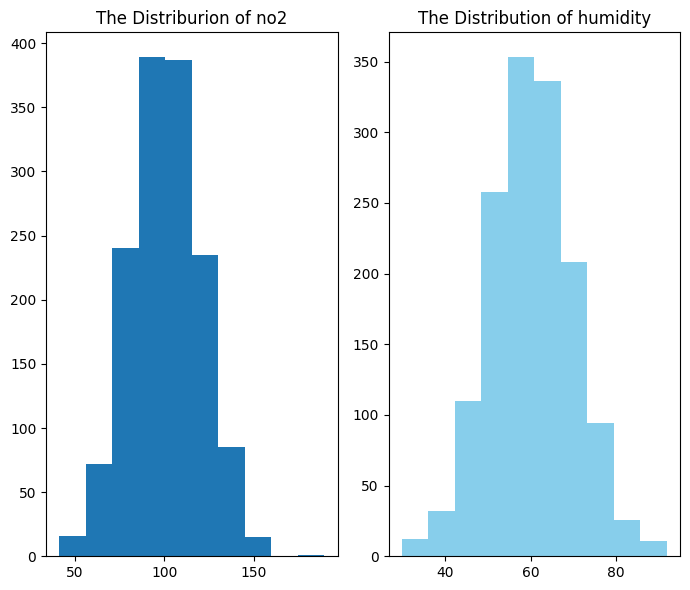

In [297]:
dist_no_hum= plt.figure(figsize= (7,6))
ra1= dist_no_hum.add_subplot(1,2,1)
ra2=dist_no_hum.add_subplot(1,2,2)

ra1.hist(df['NO2(ppb)'])
ra1.set_title('The Distriburion of no2')

ra2.hist(df['Humidity(%)'], color= 'skyblue')
ra2.set_title('The Distribution of humidity')

plt.tight_layout()
plt.show()

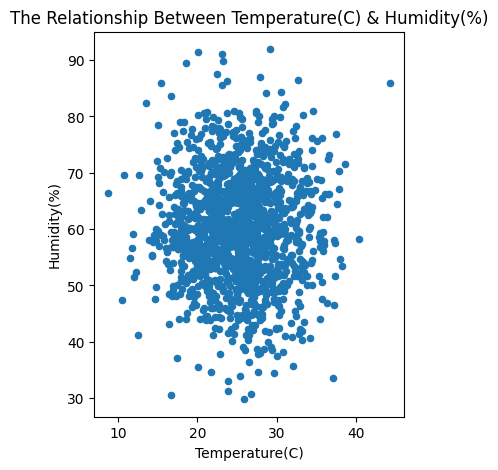

In [298]:
scatter_tem_hum=df.plot.scatter('Temperature(C)', 'Humidity(%)', figsize=(4,5))
plt.title('The Relationship Between Temperature(C) & Humidity(%)')
plt.show()



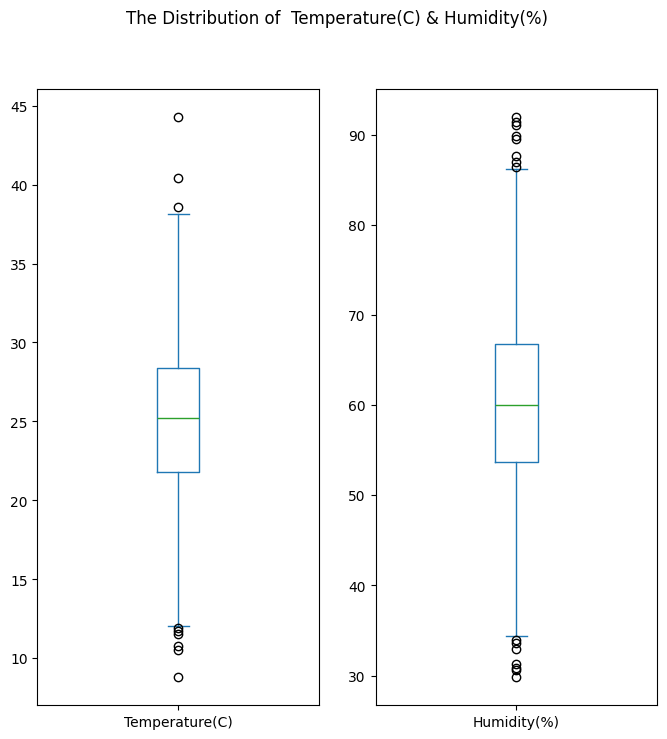

In [299]:
dist_temp_hum= df[['Temperature(C)', 'Humidity(%)']].plot(kind= 'box', figsize=(8,8), subplots= True, layout=(1,2), sharex= False, sharey= False, 
                                                   title='The Distribution of  Temperature(C) & Humidity(%)')
plt.show()

In [300]:
df= df.iloc[:, [0,4]]
df2

,Timestamp,PM10(μg/m³)
0,01-01-2024 00:00,337.626685
1,01-01-2024 01:00,125.466573
2,01-01-2024 02:00,170.103418
3,01-01-2024 03:00,236.191337
4,01-01-2024 04:00,179.877096
...,...,...
1435,29-02-2024 19:00,188.498352
1436,29-02-2024 20:00,248.066549
1437,29-02-2024 21:00,267.094867
1438,29-02-2024 22:00,306.610141


In [301]:
df2.to_csv('air_quality_data.csv_', index= False)
print('Sucessfully')

Sucessfully


In [302]:
df3= pd.read_csv('air_quality_data.csv_', index_col=[0], parse_dates= [0])     # Mainly csv fie saved as df3
df3.head()

,PM10(μg/m³)
Timestamp,
01-01-2024 00:00,337.626685
01-01-2024 01:00,125.466573
01-01-2024 02:00,170.103418
01-01-2024 03:00,236.191337
01-01-2024 04:00,179.877096


In [303]:
type(df3)

pandas.core.frame.DataFrame

In [304]:
series_values= df3.values
series_values


type(series_values)

numpy.ndarray

In [305]:
df3.tail()

,PM10(μg/m³)
Timestamp,
29-02-2024 19:00,188.498352
29-02-2024 20:00,248.066549
29-02-2024 21:00,267.094867
29-02-2024 22:00,306.610141
29-02-2024 23:00,191.358142


In [306]:
df3.describe()

,PM10(μg/m³)
count,1440.000000
mean,251.295801
std,54.586633
min,79.937820
25%,214.196144
50%,249.434321
75%,288.507064
max,428.661446


<Axes: xlabel='Timestamp'>

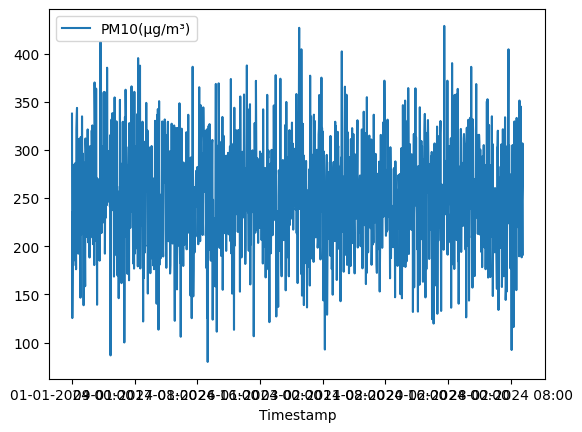

In [307]:
df3.plot()

In [308]:
df3_mean= df3.rolling(window= 30).mean()

****************************************


<Axes: xlabel='Timestamp'>

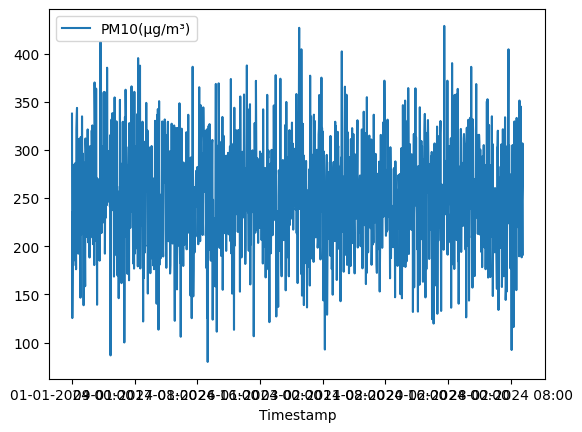

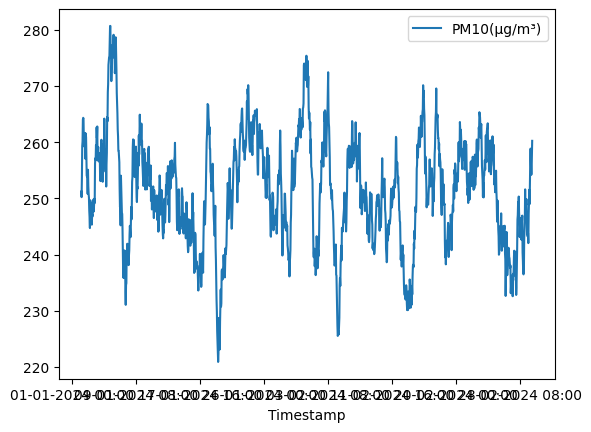

In [309]:
df3.plot()
print('*'*40)
df3_mean.plot()

In [310]:
value=pd.DataFrame(series_values)

In [311]:
pm_df= pd.concat([value, value.shift(1)], axis= 1)
pm_df.head()

,0,0
0,337.626685,NaN
1,125.466573,337.626685
2,170.103418,125.466573
3,236.191337,170.103418
4,179.877096,236.191337


In [312]:
pm_df.columns= ['Actual_PM10', 'Forecast_PM10']
pm_df.head()

,Actual_PM10,Forecast_PM10
0,337.626685,NaN
1,125.466573,337.626685
2,170.103418,125.466573
3,236.191337,170.103418
4,179.877096,236.191337


### find Error

In [313]:
from sklearn.metrics import mean_squared_error


In [314]:
pm_test=pm_df[1:]
pm_test.tail()

,Actual_PM10,Forecast_PM10
1435,188.498352,307.166993
1436,248.066549,188.498352
1437,267.094867,248.066549
1438,306.610141,267.094867
1439,191.358142,306.610141


In [315]:
pm_error= mean_squared_error(pm_test.Actual_PM10, pm_test.Forecast_PM10)
pm_error

np.float64(6117.829100697351)

In [316]:
np.sqrt(pm_error)

np.float64(78.21655260043971)

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf     
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import auto_arima

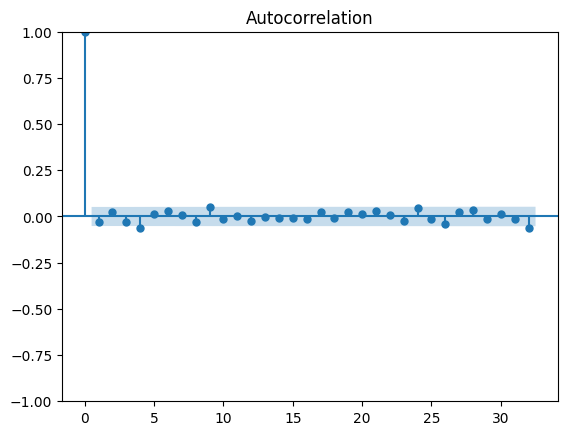

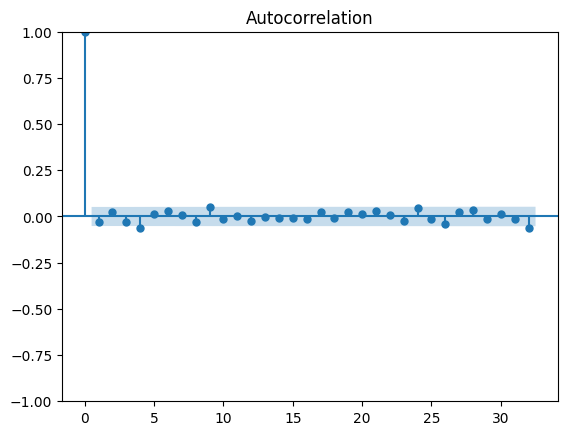

In [318]:
plot_acf(df3)   #Q value

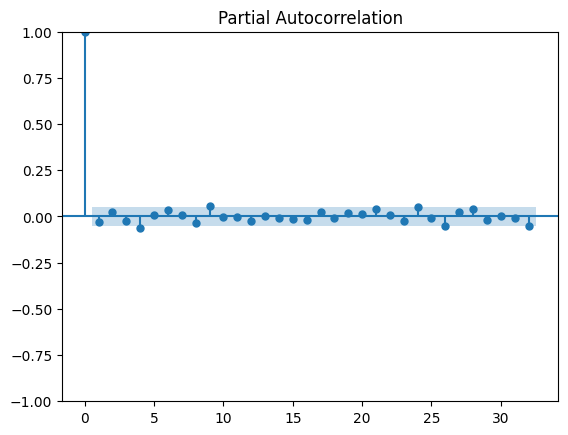

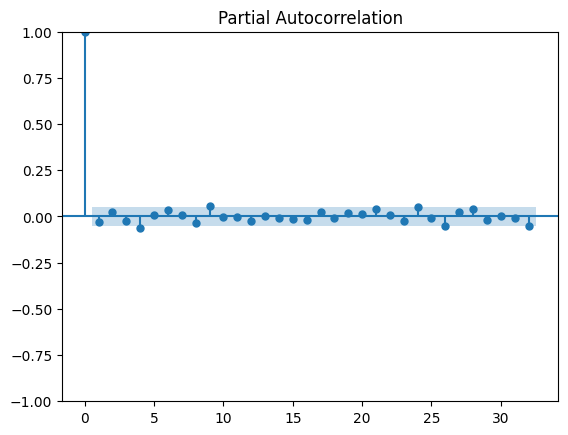

In [319]:
plot_pacf(df3)  # for identify the values of p

In [266]:
 # then p =2,3 , d=0 , q= 2.3


### Train & Test 

In [320]:
pm_train= df3[0:1152]
pm_test= df3[1152:1440]

In [321]:
print(pm_train.size)
print('*'*20)
pm_test.size

1152
********************


288

In [322]:
from statsmodels.tsa.arima_model import ARIMA

In [323]:
df['date'] = pd.to_datetime(df['Timestamp'], format='mixed', dayfirst=True)
df['date']

0      2024-01-01 00:00:00
1      2024-01-01 01:00:00
2      2024-01-01 02:00:00
3      2024-01-01 03:00:00
4      2024-01-01 04:00:00
               ...        
1435   2024-02-29 19:00:00
1436   2024-02-29 20:00:00
1437   2024-02-29 21:00:00
1438   2024-02-29 22:00:00
1439   2024-02-29 23:00:00
Name: date, Length: 1440, dtype: datetime64[ns]

In [324]:
from statsmodels.tsa.arima.model import ARIMA


In [325]:
# Fit ARIMA model (for example, ARIMA(1, 1, 1))
model = ARIMA(pm_train, order=(1, 1, 1))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=39)
print(forecast)

1152    251.589144
1153    251.543830
1154    251.544295
1155    251.544291
1156    251.544291
1157    251.544291
1158    251.544291
1159    251.544291
1160    251.544291
1161    251.544291
1162    251.544291
1163    251.544291
1164    251.544291
1165    251.544291
1166    251.544291
1167    251.544291
1168    251.544291
1169    251.544291
1170    251.544291
1171    251.544291
1172    251.544291
1173    251.544291
1174    251.544291
1175    251.544291
1176    251.544291
1177    251.544291
1178    251.544291
1179    251.544291
1180    251.544291
1181    251.544291
1182    251.544291
1183    251.544291
1184    251.544291
1185    251.544291
1186    251.544291
1187    251.544291
1188    251.544291
1189    251.544291
1190    251.544291
Name: predicted_mean, dtype: float64


In [326]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model (for example, SARIMAX(1, 1, 1, seasonal_order=(1, 1, 1, 12)))
model = SARIMAX(pm_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=39)
print(forecast)


1152    258.663892
1153    250.457860
1154    248.304841
1155    245.056377
1156    253.714673
1157    250.271377
1158    244.478605
1159    260.810938
1160    247.365590
1161    255.484674
1162    253.320421
1163    236.433430
1164    255.935352
1165    249.968874
1166    247.365630
1167    244.238535
1168    252.256083
1169    250.752969
1170    246.318595
1171    260.090227
1172    249.274385
1173    250.388284
1174    252.326639
1175    236.808113
1176    256.000877
1177    249.948030
1178    247.362149
1179    244.230372
1180    252.272632
1181    250.694694
1182    246.207932
1183    260.078319
1184    249.161068
1185    250.545126
1186    252.325262
1187    236.753961
1188    255.958647
1189    249.909131
1190    247.322580
Name: predicted_mean, dtype: float64


In [327]:
model_fit.aic

np.float64(12395.694770267959)

In [328]:
forecast

1152    258.663892
1153    250.457860
1154    248.304841
1155    245.056377
1156    253.714673
1157    250.271377
1158    244.478605
1159    260.810938
1160    247.365590
1161    255.484674
1162    253.320421
1163    236.433430
1164    255.935352
1165    249.968874
1166    247.365630
1167    244.238535
1168    252.256083
1169    250.752969
1170    246.318595
1171    260.090227
1172    249.274385
1173    250.388284
1174    252.326639
1175    236.808113
1176    256.000877
1177    249.948030
1178    247.362149
1179    244.230372
1180    252.272632
1181    250.694694
1182    246.207932
1183    260.078319
1184    249.161068
1185    250.545126
1186    252.325262
1187    236.753961
1188    255.958647
1189    249.909131
1190    247.322580
Name: predicted_mean, dtype: float64

In [329]:
df3

,PM10(μg/m³)
Timestamp,
01-01-2024 00:00,337.626685
01-01-2024 01:00,125.466573
01-01-2024 02:00,170.103418
01-01-2024 03:00,236.191337
01-01-2024 04:00,179.877096
...,...
29-02-2024 19:00,188.498352
29-02-2024 20:00,248.066549
29-02-2024 21:00,267.094867


### Normalization 

In [330]:
df3.min()

PM10(μg/m³)    79.93782
dtype: float64

In [331]:
df3.max()

PM10(μg/m³)    428.661446
dtype: float64

In [332]:
from sklearn.preprocessing import MinMaxScaler

In [333]:
pm_arr= df3.values
pm_arr

array([[337.6266853],
       [125.4665727],
       [170.1034179],
       ...,
       [267.094867 ],
       [306.610141 ],
       [191.3581417]])

In [334]:
scaler= MinMaxScaler(feature_range=(0,1))
scaler= scaler.fit(pm_arr)


In [335]:
scaler.data_range_

array([348.72362502])

In [336]:
pm_normalize= scaler.transform(pm_arr)
pm_normalize[0]

array([0.73894869])

In [337]:
pm_normalize[1]

array([0.13055827])

In [338]:
for i in range(5):
    print(pm_normalize[i])

[0.73894869]
[0.13055827]
[0.2585589]
[0.44807264]
[0.28658591]


In [339]:
pm_train_normalize=pm_normalize[0:1152]
pm_test_normalize=pm_normalize[1152:1440]

In [340]:
pm_train.size

1152

In [341]:
pm_test.size

288

In [342]:
model = ARIMA(pm_train_normalize, order=(1, 1, 1))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=39)
print(forecast)

[0.49223306 0.49210377 0.49210509 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508 0.49210508
 0.49210508 0.49210508 0.49210508]


In [343]:
pm_test[:39]

,PM10(μg/m³)
Timestamp,
18-02-2024 00:00,229.748936
18-02-2024 01:00,231.581485
18-02-2024 02:00,119.737174
18-02-2024 03:00,275.544348
18-02-2024 04:00,293.253382
18-02-2024 05:00,306.714840
18-02-2024 06:00,286.170168
18-02-2024 07:00,242.673217
18-02-2024 08:00,220.334369


In [344]:
model_fit.aic

np.float64(-1013.7935969185212)

In [345]:
forecast_reshape= forecast.reshape(len(forecast), 1)


In [346]:
forecast_reverse=scaler.inverse_transform(forecast_reshape)
forecast_reverse

array([[251.59111727],
       [251.54603181],
       [251.54649246],
       [251.54648775],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ],
       [251.5464878 ]])

In [ ]:
pm_test_reshape= pm_test.reshape(len(pm_test),1)
pm_test_reverse=scaler.inverse_transform(pm_test_reshape)

In [348]:
errors= np.sqrt(mean_squared_error(forecast_reverse, forecast))
errors

np.float64(251.05551233983465)

### Standarization

In [350]:
from sklearn.preprocessing import StandardScaler

In [351]:
std_scaler= StandardScaler()
std_scaler= std_scaler.fit(pm_arr)

In [352]:
std_scaler.mean_

array([251.29580104])

In [353]:
std_scaler.var_

array([2977.63123762])

In [354]:
std_pm= std_scaler.transform(pm_arr)
std_pm[0]

array([1.58208835])

In [355]:
for i in range(5):
    print(std_pm[i])

[1.58208835]
[-2.30592978]
[-1.48792086]
[-0.27680241]
[-1.30880973]


In [356]:
std_pm_train=std_pm[0:1152]
std_pm_test= std_pm[1152:1440]

In [357]:
model = ARIMA(std_pm_train, order=(1, 1, 1))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=39)
print(forecast)

[0.00541543 0.00458552 0.00459403 0.00459394 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395 0.00459395
 0.00459395 0.00459395 0.00459395]


In [358]:
model_fit.aic

np.float64(3256.0435089278235)

In [359]:
pm_test[:39]

,PM10(μg/m³)
Timestamp,
18-02-2024 00:00,229.748936
18-02-2024 01:00,231.581485
18-02-2024 02:00,119.737174
18-02-2024 03:00,275.544348
18-02-2024 04:00,293.253382
18-02-2024 05:00,306.714840
18-02-2024 06:00,286.170168
18-02-2024 07:00,242.673217
18-02-2024 08:00,220.334369


In [360]:
forecast_reshape= forecast.reshape(len(forecast), 1)
forecast_reverse= std_scaler.inverse_transform(forecast_reshape)

In [361]:
forecast_reverse

array([[251.59130823],
       [251.54602195],
       [251.54648669],
       [251.54648192],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197],
       [251.54648197]])

In [362]:
pm_test_reshape= std_pm_test.reshape(len(std_pm_test), 1)


In [363]:
pm_test_rev = std_scaler.inverse_transform(pm_test_reshape)
pm_test_rev[:39]

array([[229.748936 ],
       [231.5814846],
       [119.7371736],
       [275.5443476],
       [293.2533817],
       [306.7148405],
       [286.1701677],
       [242.6732171],
       [220.3343693],
       [251.9332002],
       [302.3997716],
       [158.9031609],
       [248.189848 ],
       [324.2130861],
       [129.9180546],
       [215.7290419],
       [314.3581549],
       [205.7505708],
       [243.6234055],
       [270.9596474],
       [259.5298195],
       [231.1431003],
       [219.0421905],
       [316.7100522],
       [330.0088788],
       [226.0244984],
       [132.8358912],
       [230.7470474],
       [237.7505734],
       [263.943532 ],
       [214.8782461],
       [210.6434933],
       [249.1499058],
       [258.3163958],
       [196.3410324],
       [231.1993932],
       [428.6614455],
       [292.9374587],
       [233.0165934]])

### Feature Engineering

In [365]:
df3['log1']= df3['PM10(μg/m³)'].shift(1)
df3.head()

,PM10(μg/m³),log1
Timestamp,,
01-01-2024 00:00,337.626685,NaN
01-01-2024 01:00,125.466573,337.626685
01-01-2024 02:00,170.103418,125.466573
01-01-2024 03:00,236.191337,170.103418
01-01-2024 04:00,179.877096,236.191337


In [366]:
df3['log2']= df3['PM10(μg/m³)'].shift(2)
df3.head()

,PM10(μg/m³),log1,log2
Timestamp,,,
01-01-2024 00:00,337.626685,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685
01-01-2024 03:00,236.191337,170.103418,125.466573
01-01-2024 04:00,179.877096,236.191337,170.103418


In [367]:
df3['log3']= df3['PM10(μg/m³)'].shift(3)
df3.head()

,PM10(μg/m³),log1,log2,log3
Timestamp,,,,
01-01-2024 00:00,337.626685,NaN,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685,NaN
01-01-2024 03:00,236.191337,170.103418,125.466573,337.626685
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573


In [368]:
df3['log4']= df3['PM10(μg/m³)'].shift(4)
df3.head()

,PM10(μg/m³),log1,log2,log3,log4
Timestamp,,,,,
01-01-2024 00:00,337.626685,NaN,NaN,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN,NaN,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685,NaN,NaN
01-01-2024 03:00,236.191337,170.103418,125.466573,337.626685,NaN
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573,337.626685


In [369]:
df3['MA1']= df3['PM10(μg/m³)'].rolling(window=3).mean()
df3.head()

,PM10(μg/m³),log1,log2,log3,log4,MA1
Timestamp,,,,,,
01-01-2024 00:00,337.626685,NaN,NaN,NaN,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN,NaN,NaN,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685,NaN,NaN,211.065559
01-01-2024 03:00,236.191337,170.103418,125.466573,337.626685,NaN,177.253776
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573,337.626685,195.390617


In [370]:
df3['MA2']= df3['PM10(μg/m³)'].rolling(window=4).max()
df3.head()

,PM10(μg/m³),log1,log2,log3,log4,MA1,MA2
Timestamp,,,,,,,
01-01-2024 00:00,337.626685,NaN,NaN,NaN,NaN,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN,NaN,NaN,NaN,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685,NaN,NaN,211.065559,NaN
01-01-2024 03:00,236.191337,170.103418,125.466573,337.626685,NaN,177.253776,337.626685
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573,337.626685,195.390617,236.191337


In [371]:
df3['MA3']= df3['PM10(μg/m³)'].rolling(window=5).std()
df3.head()

,PM10(μg/m³),log1,log2,log3,log4,MA1,MA2,MA3
Timestamp,,,,,,,,
01-01-2024 00:00,337.626685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-01-2024 01:00,125.466573,337.626685,NaN,NaN,NaN,NaN,NaN,NaN
01-01-2024 02:00,170.103418,125.466573,337.626685,NaN,NaN,211.065559,NaN,NaN
01-01-2024 03:00,236.191337,170.103418,125.466573,337.626685,NaN,177.253776,337.626685,NaN
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573,337.626685,195.390617,236.191337,81.57738


In [372]:
df3.dropna()    # Redy for putting values in modeules 

,PM10(μg/m³),log1,log2,log3,log4,MA1,MA2,MA3
Timestamp,,,,,,,,
01-01-2024 04:00,179.877096,236.191337,170.103418,125.466573,337.626685,195.390617,236.191337,81.577380
01-01-2024 05:00,254.317696,179.877096,236.191337,170.103418,125.466573,223.462043,254.317696,52.159363
01-01-2024 06:00,274.081943,254.317696,179.877096,236.191337,170.103418,236.092245,274.081943,45.885103
01-01-2024 07:00,252.628203,274.081943,254.317696,179.877096,236.191337,260.342614,274.081943,35.894393
01-01-2024 08:00,285.080456,252.628203,274.081943,254.317696,179.877096,270.596867,285.080456,41.079577
...,...,...,...,...,...,...,...,...
29-02-2024 19:00,188.498352,307.166993,191.536008,344.989099,197.672301,229.067118,344.989099,74.411981
29-02-2024 20:00,248.066549,188.498352,307.166993,191.536008,344.989099,247.910631,307.166993,69.484038
29-02-2024 21:00,267.094867,248.066549,188.498352,307.166993,191.536008,234.553256,307.166993,50.770729


#### 4. Stationary Time Series -Testing

array([[<Axes: title={'center': 'PM10(μg/m³)'}>,
        <Axes: title={'center': 'log1'}>,
        <Axes: title={'center': 'log2'}>],
       [<Axes: title={'center': 'log3'}>,
        <Axes: title={'center': 'log4'}>,
        <Axes: title={'center': 'MA1'}>],
       [<Axes: title={'center': 'MA2'}>, <Axes: title={'center': 'MA3'}>,
        <Axes: >]], dtype=object)

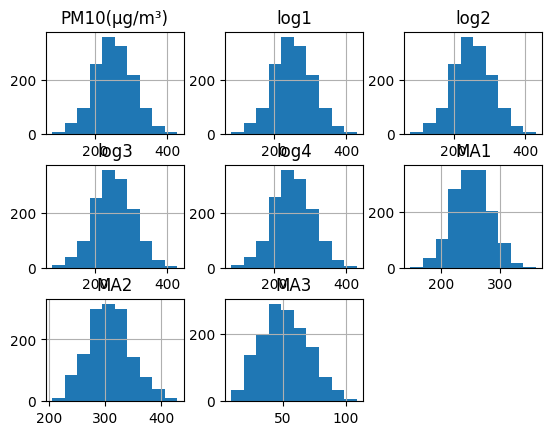

In [373]:
df3.hist()

>>>>  PM 10 is slightly right towards

In [374]:
from statsmodels.tsa.stattools import adfuller

In [375]:
df3= pd.read_csv('air_quality_data.csv_', index_col=[0], parse_dates= [0])     # Mainly csv fie saved as df3
df3.head()

,PM10(μg/m³)
Timestamp,
01-01-2024 00:00,337.626685
01-01-2024 01:00,125.466573
01-01-2024 02:00,170.103418
01-01-2024 03:00,236.191337
01-01-2024 04:00,179.877096


In [376]:
type(df3.values)

numpy.ndarray

In [377]:
import pandas as pd

# Convert to Series if there's only one column
if df3.shape[1] == 1:
    df = df3.iloc[:, 0]

print(df)


Timestamp
01-01-2024 00:00    337.626685
01-01-2024 01:00    125.466573
01-01-2024 02:00    170.103418
01-01-2024 03:00    236.191337
01-01-2024 04:00    179.877096
                       ...    
29-02-2024 19:00    188.498352
29-02-2024 20:00    248.066549
29-02-2024 21:00    267.094867
29-02-2024 22:00    306.610141
29-02-2024 23:00    191.358142
Name: PM10(μg/m³), Length: 1440, dtype: float64


In [378]:
adf_test= adfuller(df)

In [379]:
adf_test[0]

np.float64(-20.510136584782696)

In [380]:
adf_test[1]

0.0

<Axes: >

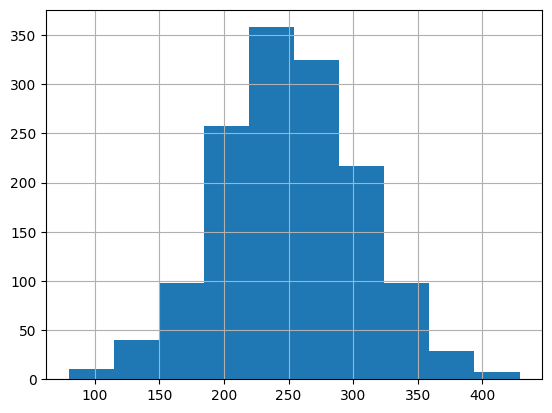

In [381]:
df.hist()

### HyperParameters Tunning

In [263]:
from sklearn.metrics import mean_squared_error

In [382]:
p_values=range(0,8)
d_values= range(0,4)
q_values= range(0,5)


In [383]:
for p in p_values:
    for d in d_values:
        for q in d_values:
            order= (p,d,q)
            train, test=df3[0:1152]  , df3[1152:1440]
            predictions= list()
            for i in range(len(test)):
                try:
                    
                    model= ARIMA(train, order)
                    model_fit= model.fit(disp= 0)
                    pred_y= model.fit_forecast()[0]
                    predictions.append(pred_y)
                    error= mean_squared_error(test, predictions)
                    print("ARIMA MSE=" (order, error))
                except:
                    continue



#HEre will dispyed on which arima model pdq values accuracy how will be , this can choose on later.

In [ ]:
# NOt showing order and how may errors (May be some kind of miswritten here )